<a href="https://colab.research.google.com/github/mefy-Aruna/Covid-App/blob/master/newdatasetRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'new.csv')


In [29]:
x = df.iloc[:, 0:14].values
y = df.iloc[:, 14].values
x

array([[  0.        ,  56.        ,   3.5       , ...,  50.        ,
         17.        , 207.        ],
       [  0.        ,  72.        ,   4.6       , ...,  63.52710171,
         50.3239521 , 401.967626  ],
       [  0.        ,  72.        ,  16.5       , ...,  80.        ,
         42.        , 651.        ],
       ...,
       [  1.        ,  44.        ,  15.7       , ..., 109.0030911 ,
         55.46432938, 272.        ],
       [  1.        ,  41.        ,  12.        , ..., 201.        ,
         14.        , 266.        ],
       [  0.        ,  53.        ,  17.9       , ...,  50.26380301,
        -21.61810601, 258.        ]])

In [4]:
x = df.iloc[:, :-1].values
x


array([[  0.        ,  56.        ,   3.5       , ...,  50.        ,
         17.        , 207.        ],
       [  0.        ,  72.        ,   4.6       , ...,  63.52710171,
         50.3239521 , 401.967626  ],
       [  0.        ,  72.        ,  16.5       , ...,  80.        ,
         42.        , 651.        ],
       ...,
       [  1.        ,  44.        ,  15.7       , ..., 109.0030911 ,
         55.46432938, 272.        ],
       [  1.        ,  41.        ,  12.        , ..., 201.        ,
         14.        , 266.        ],
       [  0.        ,  53.        ,  17.9       , ...,  50.26380301,
        -21.61810601, 258.        ]])

In [39]:
acc=0

In [40]:
# Train Test Split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

while acc<0.89:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
# Preprocessing

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(x_train)

  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)
  from sklearn.ensemble import RandomForestClassifier
  RFclassifier = RandomForestClassifier(n_estimators = 200,random_state=0,warm_start=True)
  RFclassifier.fit(x_train, y_train)
  y_pred = RFclassifier.predict(x_test)
  #print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  acc=accuracy_score(y_test, y_pred)
  print(acc)




              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.89      0.87      0.88        39

    accuracy                           0.84        56
   macro avg       0.81      0.82      0.81        56
weighted avg       0.84      0.84      0.84        56

0.8392857142857143
              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.86      0.95      0.90        39

    accuracy                           0.86        56
   macro avg       0.85      0.80      0.82        56
weighted avg       0.86      0.86      0.85        56

0.8571428571428571
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.86      0.86      0.86        37

    accuracy                           0.82        56
   macro avg       0.80      0.80      0.80        56
weighted avg       0.82      0.82   

In [41]:
  RFclassifier = RandomForestClassifier(n_estimators = 200,random_state=0,warm_start=True)
  RFclassifier.fit(x_train, y_train)
  y_pred = RFclassifier.predict(x_test)
  #print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  acc=accuracy_score(y_test, y_pred)
  print(acc)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.89      1.00      0.94        34

    accuracy                           0.93        56
   macro avg       0.95      0.91      0.92        56
weighted avg       0.94      0.93      0.93        56

0.9285714285714286


In [42]:
labelProb =RFclassifier.predict_proba(x_test)



In [43]:
alpha=0.80
beta=0.4

finalProb=[]
finalLabelProb=[]
#labelProbList=labelProb.tolist()


In [44]:
for i in labelProb:
 # print("list: i is:",i)
  if i[1] > alpha and i[1]> i[0]:
    ele =i[1]
   # print("positive")
    add=1
    finalProb.append(add)
    finalLabelProb.append(add)

  elif i[0]>beta and i[0]>i[1]:
   # print("negative")
    add=0
    finalProb.append(add)
    finalLabelProb.append(add)
  else:
    #print("abstention incurred")
    add=2
    ##remove prob with target as 2
    finalProb.append(add)
    
  


  


In [45]:
index=[]
for i, e in enumerate(finalProb):
   if e == 2:
     
     index.append(i)
  
print(index)


[5, 6, 10, 15, 16, 18, 28, 31, 32, 33, 34, 36, 38, 41, 45, 50]


In [46]:
y_test_dup=y_test
y_test_dup=y_test_dup.tolist()
final_y_test = [i for j, i in enumerate(y_test_dup) if j not in index]


#for pos in index:
  #print(pos)

####use anotehr variable to pop as this is removing and using the same list to remove again and hence th error
  #y_test_final=y_test_dup.pop(pos)

# RESULT

In [47]:

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
print(accuracy_score(final_y_test, finalLabelProb)) 

1.0


In [48]:

import pickle
filename = 'bestClassifier.pkl'
pickle.dump(RFclassifier, open(filename, 'wb'))

In [ ]:
#ROC curves
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, labelProb[:,1])
sensitivity = tpr #alpha
specificity= 1-fpr #beta

In [ ]:
sensitivity

array([0.        , 0.02439024, 0.09756098, 0.17073171, 0.26829268,
       0.34146341, 0.41463415, 0.48780488, 0.53658537, 0.6097561 ,
       0.65853659, 0.70731707, 0.7804878 , 0.90243902, 0.90243902,
       0.95121951, 0.95121951, 0.97560976, 0.97560976, 1.        ,
       1.        , 1.        , 1.        ])

In [ ]:
specificity

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.93333333, 0.73333333, 0.73333333, 0.6       , 0.6       ,
       0.53333333, 0.4       , 0.        ])

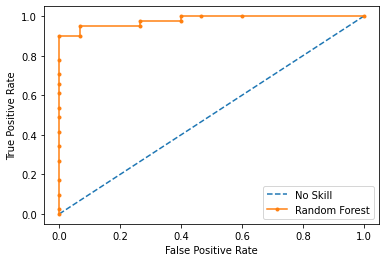

In [ ]:
# plot the roc curve for the model
from matplotlib import pyplot

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.635000, G-Mean=0.950


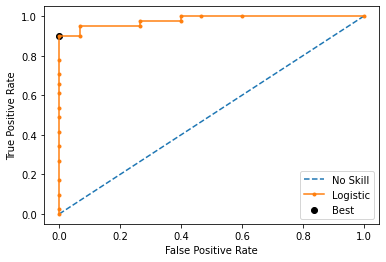

In [ ]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, finalProb)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=1.000000


Best Threshold=1.000000, F-Score=0.941


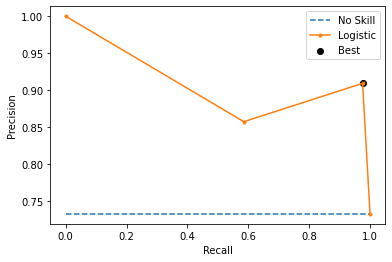

In [ ]:
# calculate roc curves
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, finalProb)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [1]:
import numpy as np
import pickle
import pandas as pd
import streamlit as st 


In [2]:
pickle_in = open("bestClassifier.pkl","rb")
classifier=pickle.load(pickle_in)

In [3]:
def welcome():
    return "Welcome All"

In [4]:
def predict_note_authentication(SESSO, AGE, WBC, Piastrine, Neutrofili, Monociti, Eosinofili, Basofili, AST, ALT, ALP, GGT, LDH):
    
    """Let's Authenticate the Banks Note 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: SESSO
        in: query
        type: number
        required: true
      - name: AGE
        in: query
        type: number
        required: true
      - name: WBC
        in: query
        type: number
        required: true
      - name: Piastrine
        in: query
        type: number
        required: true
      - name: Neutrofili
        in: query
        type: number
        required: true
      - name: Monociti
        in: query
        type: number
        required: true
      - name: Eosinofili
        in: query
        type: number
        required: true
      - name: Basofili
        in: query
        type: number
        required: true
      - name: AST
        in: query
        type: number
        required: true
      - name: ALT
        in: query
        type: number
        required: true
      - name: ALP
        in: query
        type: number
        required: true
      - name: GGT
        in: query
        type: number
        required: true
      - name: LDH
        in: query
        type: number
        required: true
    responses:
        200:
            description: The output values
        
    """
   
    prediction=classifier.predict([[SESSO, AGE, WBC, Piastrine, Neutrofili, Monociti, Eosinofili, Basofili, AST, ALT, ALP, GGT, LDH]])
    print(prediction)
    return prediction

In [6]:
def main():
    st.title("Covid'19")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Covid'19 </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    SESSO = st.text_input("Gender (For Male type: 0 / For Female type: 1)","Type Here")
    AGE = st.text_input("AGE","Type Here")
    WBC = st.text_input("WBC","Type Here")
    Piastrine = st.text_input("Piastrine","Type Here")
    Neutrofili = st.text_input("Neutrofili","Type Here")
    Monociti = st.text_input("Monociti","Type Here")
    Eosinofili = st.text_input("Eosinofili","Type Here")
    Basofili = st.text_input("Basofili","Type Here")
    AST = st.text_input("AST","Type Here")
    ALT = st.text_input("ALT","Type Here")
    ALP = st.text_input("ALP","Type Here")
    GGT = st.text_input("GGT","Type Here")
    LDH = st.text_input("LDH","Type Here")

    result=""
    if st.button("Predict"):
        result=predict_note_authentication(SESSO, AGE, WBC, Piastrine, Neutrofili, Monociti, Eosinofili, Basofili, AST, ALT, ALP, GGT, LDH)
    st.success('The output is  {}'.format(result))
    if st.button("About"):
        st.text("Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.")
        st.text("Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment.")

if __name__=='__main__':
    main()
    